# Text Data Loading, Creating a DataFrame

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
import os
from textblob import TextBlob
import datetime as dt
from wordcloud import WordCloud
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

In [3]:
# Import csv file into a dataframe
df_hourly = pd.read_csv('./Resources/Hourly_Data_by_year.csv')

In [4]:
# convert the timezone to CST
df_hourly['Datetime'] = pd.to_datetime(df_hourly['Datetime'], utc=True)
df_hourly['Datetime'] = pd.DatetimeIndex(df_hourly['Datetime']).tz_convert('US/Central')
# rename the column 'Datetime'
df_hourly = df_hourly.rename(columns = {'Datetime':'date'})

In [5]:
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312

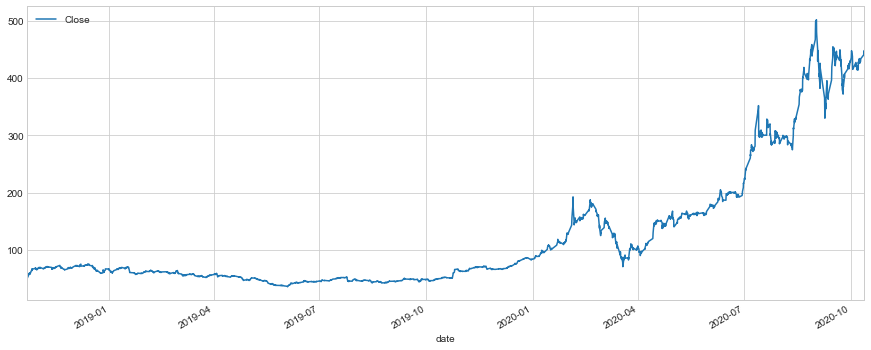

In [6]:
df_hourly.plot(x='date', y='Close', figsize=(15,6));

In [7]:
# # Import csv file into a dataframe
# df_daily = pd.read_csv('./Resources/Daily_trading_data.txt', sep=',')

In [8]:
# df_daily.head()

In [9]:
# # parsing the dates into datetime and changing the format.
# df_daily['Date'] = pd.to_datetime(df_daily['Date']).dt.date
# # rename the column
# df_daily= df_daily.rename(columns ={'Date':'date'})

In [10]:
# df_daily.plot(x='date', y='Close', figsize=(15,5));

In [11]:
# Import a text file to analyze
df_elon = pd.read_csv('./Resources/Elon_Musk_tweets_cst_final.csv')
df_elon.head()

date                                               text  Subjectivity  Polarity  Analysis
0  2020-10-12 18:58:32-05:00  good grief! spacex is getting zero money for t...      0.475000 -0.100000  Negative
1  2020-10-12 16:23:59-05:00  with fsd, we got stuck in a lot of local maxim...      0.306349  0.128571  Positive
2  2020-10-12 16:20:01-05:00                 thank you, much more accurate haha      0.477778  0.366667  Positive
3  2020-10-12 16:11:19-05:00               this graph appears to be upside down      0.288889 -0.155556  Negative
4  2020-10-12 15:29:44-05:00  sheer magnitude of the entire production syste...      0.652778  0.026389  Positive

In [12]:
df_elon['date'] = pd.to_datetime(df_elon['date'], utc=True)
df_elon['date'] = pd.DatetimeIndex(df_elon['date']).tz_convert('US/Central')

In [13]:
df_elon = df_elon.sort_values('date', ascending = True)
df_elon = df_elon.reset_index(drop=True)
df_elon.head()

date                                               text  Subjectivity  Polarity  Analysis
0 2018-01-02 23:38:16-06:00  come work at the biggest & most advanced facto...      0.616667  0.408333  Positive
1 2018-01-03 02:22:31-06:00  using a neural net to detect rain using camera...      0.150000  0.100000  Positive
2 2018-01-04 18:30:00-06:00                         falcon heavy goes vertical      0.500000 -0.200000  Negative
3 2018-01-06 20:33:02-06:00  gonna put an old school drive-in, roller skate...      0.327273  0.118182  Positive
4 2018-01-06 21:00:48-06:00                                           near 405      0.400000  0.100000  Positive

## Labelling price increase or decrease by interval

In [14]:
# df_daily['daily return'] = df_daily['Close'].pct_change()
df_hourly['hourly return'] = df_hourly['Close'].pct_change()

In [15]:
df_hourly.head()

date       Open       High        Low      Close  Adj Close   Volume  hourly return
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345            NaN
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531       0.010650
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777      -0.004122
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134       0.003788
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312      -0.000622

In [16]:
# Or add a column with binary number.
def getBinary(score):
    if score <= 0:
        return 0
    else:
        return 1

df_hourly['tick'] = df_hourly['hourly return'].apply(getBinary)
df_hourly.head(10)

date       Open       High        Low      Close  Adj Close   Volume  hourly return  tick
0 2018-10-22 08:30:00-05:00  52.190998  52.190998  50.548500  50.889999  50.889999  1606345            NaN     1
1 2018-10-22 09:30:00-05:00  50.928001  51.806000  50.857998  51.431999  51.431999   983531       0.010650     1
2 2018-10-22 10:30:00-05:00  51.415001  51.772999  51.088001  51.220001  51.220001   628777      -0.004122     0
3 2018-10-22 11:30:00-05:00  51.258003  51.779999  51.258003  51.414001  51.414001   374134       0.003788     1
4 2018-10-22 12:30:00-05:00  51.434002  52.152000  51.318001  51.382000  51.382000   554312      -0.000622     0
5 2018-10-22 13:30:00-05:00  51.400002  52.121998  51.400002  52.009998  52.009998   641530       0.012222     1
6 2018-10-22 14:30:00-05:00  52.047997  52.371998  51.944202  52.202003  52.202003   710669       0.003692     1
7 2018-10-23 08:30:00-05:00  52.723999  56.099998  52.449463  55.200001  55.200001  5546169       0.057431     1
8 2018-10-23 09:30:00-05:00  55.120003  55.671997  54.834003  55.522804  55.522804  1867080       0.005848     1
9 2018-10-23 10:30:00-05:00  55.561840  56.959999  54.944000  56.915001  56.915001  1985484       0.025074     1

In [17]:
df_hourly['date only'] = df_hourly['date'].dt.date
# df_hourly['year'] = df_hourly['date'].dt.year
# df_hourly['month'] = df_hourly['date'].dt.month
# df_hourly['day'] = df_hourly['date'].dt.day
df_hourly['hour'] = df_hourly['date'].dt.hour
# df_hourly['minute'] = df_hourly['date'].dt.minute


In [18]:
df_hourly

date        Open        High         Low       Close   Adj Close    Volume  hourly return  tick   date only  hour
0    2018-10-22 08:30:00-05:00   52.190998   52.190998   50.548500   50.889999   50.889999   1606345            NaN     1  2018-10-22     8
1    2018-10-22 09:30:00-05:00   50.928001   51.806000   50.857998   51.431999   51.431999    983531       0.010650     1  2018-10-22     9
2    2018-10-22 10:30:00-05:00   51.415001   51.772999   51.088001   51.220001   51.220001    628777      -0.004122     0  2018-10-22    10
3    2018-10-22 11:30:00-05:00   51.258003   51.779999   51.258003   51.414001   51.414001    374134       0.003788     1  2018-10-22    11
4    2018-10-22 12:30:00-05:00   51.434002   52.152000   51.318001   51.382000   51.382000    554312      -0.000622     0  2018-10-22    12
5    2018-10-22 13:30:00-05:00   51.400002   52.121998   51.400002   52.009998   52.009998    641530       0.012222     1  2018-10-22    13
6    2018-10-22 14:30:00-05:00   52.047997   52.371998   51.944202   52.202003   52.202003    710669       0.003692     1  2018-10-22    14
7    2018-10-23 08:30:00-05:00   52.723999   56.099998   52.449463   55.200001   55.200001   5546169       0.057431     1  2018-10-23     8
8    2018-10-23 09:30:00-05:00   55.120003   55.671997   54.834003   55.522804   55.522804   1867080       0.005848     1  2018-10-23     9
9    2018-10-23 10:30:00-05:00   55.561840   56.959999   54.944000   56.915001   56.915001   1985484       0.025074     1  2018-10-23    10
10   2018-10-23 11:30:00-05:00   56.939819   57.740002   56.833019   57.155998   57.155998   2326997       0.004234     1  2018-10-23    11
11   2018-10-23 12:30:00-05:00   57.174000   58.797997   56.921997   58.548023   58.548023   2501672       0.024355     1  2018-10-23    12
12   2018-10-23 13:30:00-05:00   58.549999   58.839458   58.140022   58.645000   58.645000   2083439       0.001656     1  2018-10-23    13
13   2018-10-23 14:30:00-05:00   58.652000   58.920002   58.349998   58.859997   58.859997   1843738       0.003666     1  2018-10-23    14
14   2018-10-24 08:30:00-05:00   60.235260   60.853321   57.158001   57.579998   57.579998   5943909      -0.021746     0  2018-10-24     8
15   2018-10-24 09:30:00-05:00   57.430000   59.315723   57.348000   58.322498   58.322498   2181484       0.012895     1  2018-10-24     9
16   2018-10-24 10:30:00-05:00   58.279999   59.986000   58.085999   59.876862   59.876862   1655087       0.026651     1  2018-10-24    10
17   2018-10-24 11:30:00-05:00   59.849998   59.934002   58.405998   59.105999   59.105999   1744723      -0.012874     0  2018-10-24    11
18   2018-10-24 12:30:00-05:00   59.150002   59.440002   58.200020   58.497997   58.497997   1242235      -0.010287     0  2018-10-24    12
19   2018-10-24 13:30:00-05:00   58.534004   59.217999   58.456001   58.608002   58.608002   1344253       0.001880     1  2018-10-24    13
20   2018-10-24 14:30:00-05:00   58.601280   58.756001   57.741997   57.741997   57.741997   1488226      -0.014776     0  2018-10-24    14
21   2018-10-25 08:30:00-05:00   63.476002   64.199997   60.211998   61.059998   61.059998   8343742       0.057463     1  2018-10-25     8
22   2018-10-25 09:30:00-05:00   61.059135   62.584003   60.220001   62.178001   62.178001   3151050       0.018310     1  2018-10-25     9
23   2018-10-25 10:30:00-05:00   62.227802   62.700001   61.548542   61.614002   61.614002   2018720      -0.009071     0  2018-10-25    10
24   2018-10-25 11:30:00-05:00   61.540001   62.400002   61.246002   62.168324   62.168324   1518391       0.008997     1  2018-10-25    11
25   2018-10-25 12:30:00-05:00   62.200001   62.726002   61.814003   62.575001   62.575001   1400073       0.006542     1  2018-10-25    12
26   2018-10-25 13:30:00-05:00   62.562000   63.197998   62.335999   62.491199   62.491199   2116771      -0.001339     0  2018-10-25    13
27   2018-10-25 14:30:00-05:00   62.490002   63.114002   62.029419   63.038002   63.038002   1812160      

### Text dataframe processing

In [19]:
df_elon['date only'] = df_elon['date'].dt.date
# df_elon['year'] = df_elon['date'].dt.year
# df_elon['month'] = df_elon['date'].dt.month
# df_elon['day'] = df_elon['date'].dt.day
df_elon['hour'] = df_elon['date'].dt.hour
# df_elon['minute'] = df_elon['date'].dt.minute
# df_elon_g = df_elon.groupby([df_elon.year, df_elon.month, df_elon.day, df_elon.hour]).all()
# df_elon_g = df_elon.resample('1H', on='date').showall()

In [20]:
df_elon

date                                               text  Subjectivity      Polarity  Analysis   date only  hour
0    2018-01-02 23:38:16-06:00  come work at the biggest & most advanced facto...      0.616667  4.083333e-01  Positive  2018-01-02    23
1    2018-01-03 02:22:31-06:00  using a neural net to detect rain using camera...      0.150000  1.000000e-01  Positive  2018-01-03     2
2    2018-01-04 18:30:00-06:00                         falcon heavy goes vertical      0.500000 -2.000000e-01  Negative  2018-01-04    18
3    2018-01-06 20:33:02-06:00  gonna put an old school drive-in, roller skate...      0.327273  1.181818e-01  Positive  2018-01-06    20
4    2018-01-06 21:00:48-06:00                                           near 405      0.400000  1.000000e-01  Positive  2018-01-06    21
5    2018-01-06 21:33:31-06:00  of course. and an outdoor screen that plays a ...      0.300000  1.000000e+00  Positive  2018-01-06    21
6    2018-01-06 22:24:05-06:00  good idea. we can just have the menu pop up as...      0.600000  7.000000e-01  Positive  2018-01-06    22
7    2018-01-08 11:17:45-06:00  long exposure of rocket ascent, reentry from s...      0.400000 -5.000000e-02  Negative  2018-01-08    11
8    2018-01-08 23:29:22-06:00                              fixed in next release      0.100000  5.000000e-02  Positive  2018-01-08    23
9    2018-01-09 12:37:23-06:00                         that sounds cool. will do.      0.650000  3.500000e-01  Positive  2018-01-09    12
10   2018-01-12 13:09:24-06:00  actually, you can upgrade the battery pack for...      0.531250  1.625000e-01  Positive  2018-01-12    13
11   2018-01-12 23:25:58-06:00  there aren even good normal parties in silicon...      0.625000  4.437500e-01  Positive  2018-01-12    23
12   2018-01-14 21:53:50-06:00  definitely. you will be able to do pretty much...      0.560119  2.892857e-01  Positive  2018-01-14    21
13   2018-01-14 22:07:05-06:00                                               done      0.000000  0.000000e+00   Neutral  2018-01-14    22
14   2018-01-18 13:32:56-06:00                                 check  for updates      0.000000  0.000000e+00   Neutral  2018-01-18    13
15   2018-01-24 12:35:00-06:00  falcon heavy hold-down firing this morning was...      0.550000  2.500000e-01  Positive  2018-01-24    12
16   2018-01-27 15:15:29-06:00  aiming for first flight of falcon heavy on feb...      0.433333  1.208333e-01  Positive  2018-01-27    15
17   2018-01-27 18:42:40-06:00                    say hello to my little friend        0.500000 -1.875000e-01  Negative  2018-01-27    18
18   2018-01-27 18:47:18-06:00  the boring company flamethrower guaranteed to ...      1.000000 -1.000000e+00  Negative  2018-01-27    18
19   2018-01-27 18:55:45-06:00                         great for roasting nuts         0.750000  8.000000e-01  Positive  2018-01-27    18
20   2018-01-27 19:14:11-06:00  atf says any flamethrower with a flame shorter...      0.366667  1.666667e-01  Positive  2018-01-27    19
21   2018-01-27 19:32:18-06:00                                       don do this       0.000000  0.000000e+00   Neutral  2018-01-27    19
22   2018-01-27 20:35:25-06:00  when the zombie apocalypse happens, youl be gl...      0.500000  2.500000e-01  Positive  2018-01-27    20
23   2018-01-27 21:07:40-06:00           1,000 ordered already, only 19,000 left!      0.500000  0.000000e+00   Neutral  2018-01-27    21
24   2018-01-27 22:26:25-06:00  obviously, a flamethrower is a super terrible ...      0.666667 -1.666667e-01  Negative  2018-01-27    22
25   2018-01-27 22:52:25-06:00                                unless you like fun      0.200000  3.000000e-01  Positive  2018-01-27    22
26   2018-01-28 00:00:22-06:00    good thing you didn ask about the freezegun ...      0.600000  7.000000e-01  Positive  2018-01-28     0
27   2018-01-28 00:03:40-06:00  the rumor that i secretly creating a zombie ap...      0.650000 -4.000000e-01  Negative  2018-01-28     0
28   2018-01-28 00:40:23

## Merging Dataframes

In [21]:
# Merging the dataframes by using reduce function
from functools import reduce
data_frames = [df_elon, df_hourly]
df = reduce(lambda  left,right: pd.merge(left,right,on=['date only', 'hour'],
                                            how='outer'), data_frames)
df

date_x                                               text  Subjectivity      Polarity  Analysis   date only  hour                    date_y        Open        High         Low       Close   Adj Close      Volume  hourly return  tick
0    2018-01-02 23:38:16-06:00  come work at the biggest & most advanced facto...      0.616667  4.083333e-01  Positive  2018-01-02    23                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
1    2018-01-03 02:22:31-06:00  using a neural net to detect rain using camera...      0.150000  1.000000e-01  Positive  2018-01-03     2                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
2    2018-01-04 18:30:00-06:00                         falcon heavy goes vertical      0.500000 -2.000000e-01  Negative  2018-01-04    18                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
3    2018-01-06 20:33:02-06:00  gonna put an old school drive-in, roller skate...      0.327273  1.181818e-01  Positive  2018-01-06    20                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
4    2018-01-06 21:00:48-06:00                                           near 405      0.400000  1.000000e-01  Positive  2018-01-06    21                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
5    2018-01-06 21:33:31-06:00  of course. and an outdoor screen that plays a ...      0.300000  1.000000e+00  Positive  2018-01-06    21                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
6    2018-01-06 22:24:05-06:00  good idea. we can just have the menu pop up as...      0.600000  7.000000e-01  Positive  2018-01-06    22                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
7    2018-01-08 11:17:45-06:00  long exposure of rocket ascent, reentry from s...      0.400000 -5.000000e-02  Negative  2018-01-08    11                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
8    2018-01-08 23:29:22-06:00                              fixed in next release      0.100000  5.000000e-02  Positive  2018-01-08    23                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
9    2018-01-09 12:37:23-06:00                         that sounds cool. will do.      0.650000  3.500000e-01  Positive  2018-01-09    12                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
10   2018-01-12 13:09:24-06:00  actually, you can upgrade the battery pack for...      0.531250  1.625000e-01  Positive  2018-01-12    13                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
11   2018-01-12 23:25:58-06:00  there aren even good normal parties in silicon...      0.625000  4.437500e-01  Positive  2018-01-12    23                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
12   2018-01-14 21:53:50-06:00  definitely. you will be able to do pretty much...      0.560119  2.892857e-01  Positive  2018-01-14    21                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
13   2018-01-14 22:07:05-06:00                                               done      0.000000  0.000000e+00   Neutral  2018-01-14    22                       NaT         NaN         NaN         NaN         NaN         NaN         NaN            NaN   NaN
14   2018-01-18 13:32:56-06:00                                 check  for updates      0.000000  0.000000e+00   Neutral  2018-01-18    13                       NaT      

In [22]:
# Drop unnecessary columns
df = df.drop(columns = ['Open', 'High', 'Low', 'Volume', 'Adj Close', 'Volume'])

In [23]:
df['date only'] = pd.to_datetime(df['date only'])

In [24]:
df = df[['date only', 'hour', 'Close', 'hourly return', 'tick','text', 'Subjectivity', 'Polarity', 'Analysis', 'date_x','date_y']]

In [25]:
df = df.sort_values(['date only', 'hour'], ascending=True)

In [26]:
df

date only  hour       Close  hourly return  tick                                               text  Subjectivity      Polarity  Analysis                    date_x                    date_y
0    2018-01-02    23         NaN            NaN   NaN  come work at the biggest & most advanced facto...      0.616667  4.083333e-01  Positive 2018-01-02 23:38:16-06:00                       NaT
1    2018-01-03     2         NaN            NaN   NaN  using a neural net to detect rain using camera...      0.150000  1.000000e-01  Positive 2018-01-03 02:22:31-06:00                       NaT
2    2018-01-04    18         NaN            NaN   NaN                         falcon heavy goes vertical      0.500000 -2.000000e-01  Negative 2018-01-04 18:30:00-06:00                       NaT
3    2018-01-06    20         NaN            NaN   NaN  gonna put an old school drive-in, roller skate...      0.327273  1.181818e-01  Positive 2018-01-06 20:33:02-06:00                       NaT
4    2018-01-06    21         NaN            NaN   NaN                                           near 405      0.400000  1.000000e-01  Positive 2018-01-06 21:00:48-06:00                       NaT
5    2018-01-06    21         NaN            NaN   NaN  of course. and an outdoor screen that plays a ...      0.300000  1.000000e+00  Positive 2018-01-06 21:33:31-06:00                       NaT
6    2018-01-06    22         NaN            NaN   NaN  good idea. we can just have the menu pop up as...      0.600000  7.000000e-01  Positive 2018-01-06 22:24:05-06:00                       NaT
7    2018-01-08    11         NaN            NaN   NaN  long exposure of rocket ascent, reentry from s...      0.400000 -5.000000e-02  Negative 2018-01-08 11:17:45-06:00                       NaT
8    2018-01-08    23         NaN            NaN   NaN                              fixed in next release      0.100000  5.000000e-02  Positive 2018-01-08 23:29:22-06:00                       NaT
9    2018-01-09    12         NaN            NaN   NaN                         that sounds cool. will do.      0.650000  3.500000e-01  Positive 2018-01-09 12:37:23-06:00                       NaT
10   2018-01-12    13         NaN            NaN   NaN  actually, you can upgrade the battery pack for...      0.531250  1.625000e-01  Positive 2018-01-12 13:09:24-06:00                       NaT
11   2018-01-12    23         NaN            NaN   NaN  there aren even good normal parties in silicon...      0.625000  4.437500e-01  Positive 2018-01-12 23:25:58-06:00                       NaT
12   2018-01-14    21         NaN            NaN   NaN  definitely. you will be able to do pretty much...      0.560119  2.892857e-01  Positive 2018-01-14 21:53:50-06:00                       NaT
13   2018-01-14    22         NaN            NaN   NaN                                               done      0.000000  0.000000e+00   Neutral 2018-01-14 22:07:05-06:00                       NaT
14   2018-01-18    13         NaN            NaN   NaN                                 check  for updates      0.000000  0.000000e+00   Neutral 2018-01-18 13:32:56-06:00                       NaT
15   2018-01-24    12         NaN            NaN   NaN  falcon heavy hold-down firing this morning was...      0.550000  2.500000e-01  Positive 2018-01-24 12:35:00-06:00                       NaT
16   2018-01-27    15         NaN            NaN   NaN  aiming for first flight of falcon heavy on feb...      0.433333  1.208333e-01  Positive 2018-01-27 15:15:29-06:00                       NaT
17   2018-01-27    18         NaN            NaN   NaN                    say hello to my little friend        0.500000 -1.875000e-01  Negative 2018-01-27 18:42:40-06:00                       NaT
18   2018-01-27    18         NaN            NaN   NaN  the boring company flamethrower guaranteed to ...      1.000000 -1.000000e+00  Negative 2018-01-27 18:47:18-06:00                       NaT
19   2018-01-27    18         NaN            NaN   NaN                         great f

In [27]:
# df.to_csv('./Resources/elonmusk_tweets_hourly_price.csv', index=False)

In [28]:
df_data = df.copy()

## Analysis

### Things to be considered
- What sentiment score should we use?    
  (Subjectivity or Polarity, or both combined - weighting on Polarity score with more objective one)    
- Which score value should we use to represent the same hourly(or daily) window, in case of having multiple scores?    
  (mean, count, add, take the first one or the last one, etc)   
- How to deal with texts generated off market hours including weekends?   
  (dropping them out or tagging them the same (up and down) ticker with the most recent one etc)   
 
 

### 1. Using various sentiment score(Polarity only) for all texts regardless of market hour. 

In [29]:
# take the average polarity scores in the same hour window.
df_mean = df.groupby(['date only', 'hour']).mean()
df_sum = df.groupby(['date only', 'hour']).sum()
df_count = df.groupby(['date only', 'hour']).count()
df_first = df.groupby(['date only', 'hour']).first()
df_last = df.groupby(['date only', 'hour']).last()
df_data = df_mean.copy()

In [30]:
df_data = df_data.rename(columns = {'Polarity':'polarity mean'})
df_data['polarity sum'] = df_sum['Polarity']
df_data['polarity count'] = df_count['Polarity']
df_data['polarity first'] = df_first['Polarity']
df_data['polarity last'] = df_last['Polarity']
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last
date only  hour                                                                                                                      
2018-01-02 23      NaN            NaN   NaN      0.616667       0.408333      0.408333               1        0.408333       0.408333
2018-01-03 2       NaN            NaN   NaN      0.150000       0.100000      0.100000               1        0.100000       0.100000
2018-01-04 18      NaN            NaN   NaN      0.500000      -0.200000     -0.200000               1       -0.200000      -0.200000
2018-01-06 20      NaN            NaN   NaN      0.327273       0.118182      0.118182               1        0.118182       0.118182
           21      NaN            NaN   NaN      0.350000       0.550000      1.100000               2        0.100000       1.000000

In [33]:
df_data['polarity mean change'] = df_data['polarity mean'].pct_change()
df_data['polarity sum change'] = df_data['polarity sum'].pct_change()
df_data['polarity count change'] = df_data['polarity count'].pct_change()
df_data['polarity first change'] = df_data['polarity first'].pct_change()
df_data['polarity last change'] = df_data['polarity last'].pct_change()
df_data.head()

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                     
2018-01-02 23      NaN            NaN   NaN      0.616667       0.408333      0.408333               1        0.408333       0.408333                   NaN                  NaN                    NaN                    NaN                   NaN
2018-01-03 2       NaN            NaN   NaN      0.150000       0.100000      0.100000               1        0.100000       0.100000             -0.755102            -0.755102                    0.0              -0.755102             -0.755102
2018-01-04 18      NaN            NaN   NaN      0.500000      -0.200000     -0.200000               1       -0.200000      -0.200000             -3.000000            -3.000000                    0.0              -3.000000             -3.000000
2018-01-06 20      NaN            NaN   NaN      0.327273       0.118182      0.118182               1        0.118182       0.118182             -1.590909            -1.590909                    0.0              -1.590909             -1.590909
           21      NaN            NaN   NaN      0.350000       0.550000      1.100000               2        0.100000       1.000000              3.653846             8.307692                    1.0              -0.153846              7.461538

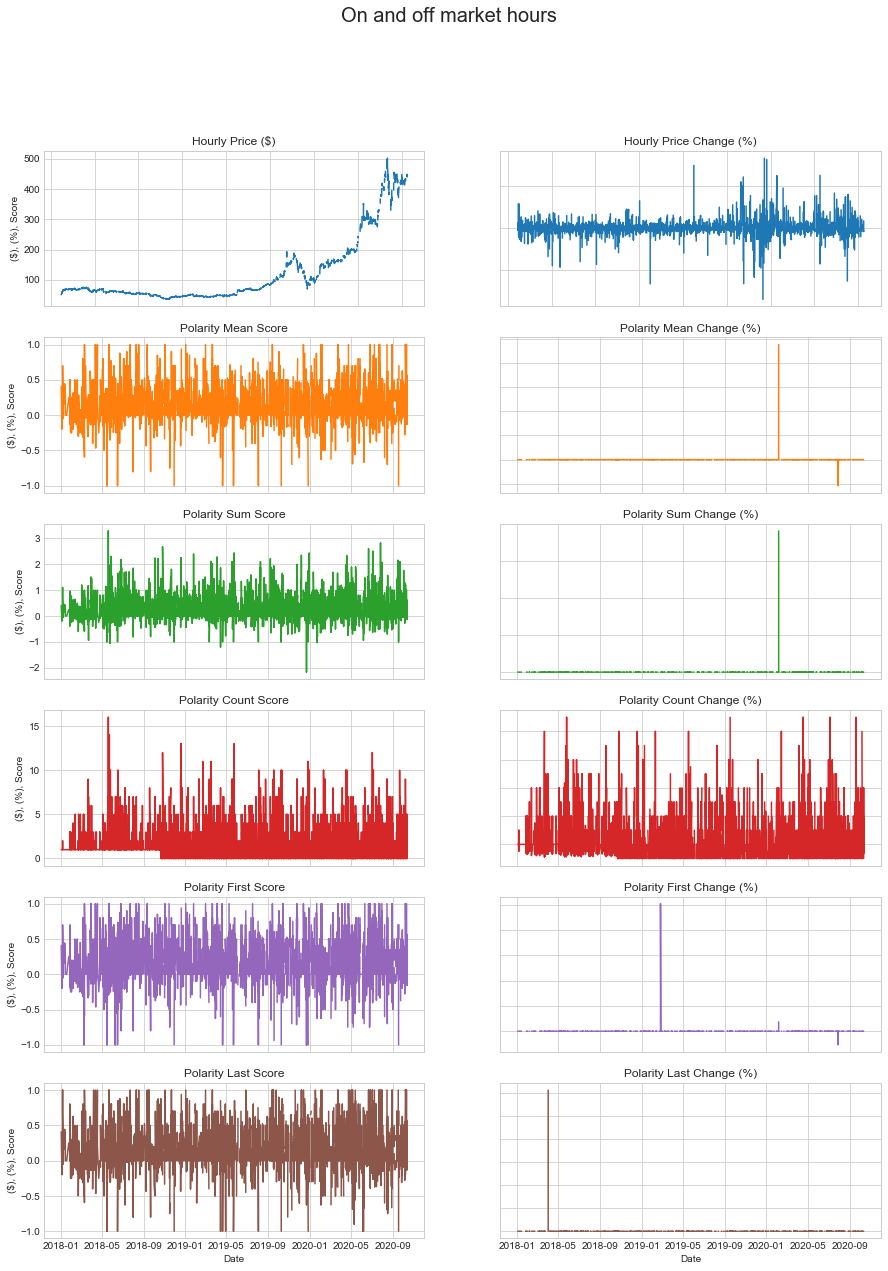

In [69]:
# plot total overviews
date_only = df_data.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
fig.suptitle('On and off market hours', fontsize=20)

axs[0, 0].plot(date_only, df_data['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_data['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_data['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_data['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_data['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_data['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_data['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_data['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_data['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_data['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_data['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_data['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


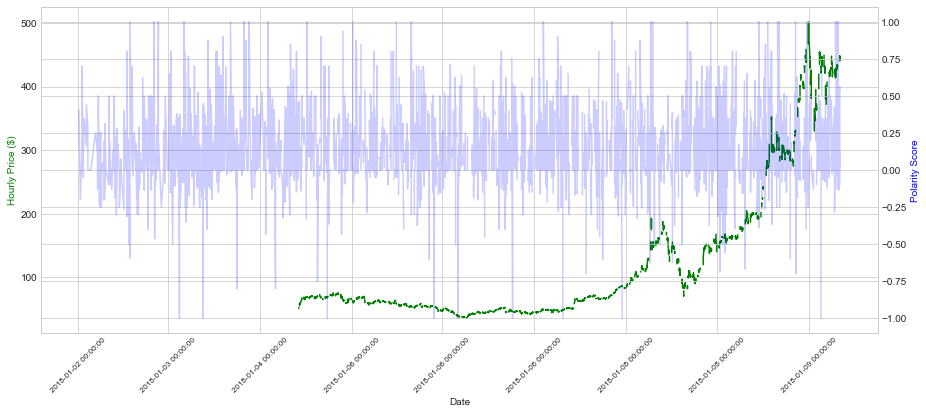

In [31]:
# plot polarity mean
date_only = df_data.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_data['Close'], color='g')
ax2.plot(date_only, df_data['polarity mean'], color='b', alpha=0.2)

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price ($)', color='g')
ax2.set_ylabel('Polarity Score', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

In [70]:
correlation_data = df_data.corr()
correlation_data

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.034185 -0.006940      0.142334       0.075796      0.024548        0.012319        0.018470       0.078274             -0.007615            -0.015448               0.021591              -0.039607             -0.015750
hourly return          0.034185       1.000000  0.547026      0.079556       0.004559     -0.014913       -0.014740        0.003477       0.006898              0.001129            -0.002084              -0.027730              -0.008701              0.013199
tick                  -0.006940       0.547026  1.000000      0.046254       0.006391     -0.007759       -0.004419       -0.016834       0.014659              0.020197             0.035287              -0.023866               0.001236              0.022207
Subjectivity           0.142334       0.079556  0.046254      1.000000       0.363756      0.268984       -0.001557        0.300147       0.317138              0.028146             0.029177              -0.006114               0.038054              0.020094
polarity mean          0.075796       0.004559  0.006391      0.363756       1.000000      0.718007       -0.021848        0.847503       0.848002              0.015942             0.020631              -0.008445               0.050533              0.017637
polarity sum           0.024548      -0.014913 -0.007759      0.268984       0.718007      1.000000        0.584882        0.611093       0.632218              0.046737             0.051493               0.400224               0.026798              0.007506
polarity count         0.012319      -0.014740 -0.004419     -0.001557      -0.021848      0.584882        1.000000       -0.018097       0.006301              0.024514             0.024216               0.756894               0.000513             -0.001456
polarity first         0.018470       0.003477 -0.016834      0.300147       0.847503      0.611093       -0.018097        1.000000       0.552888             -0.001047             0.000396              -0.009653               0.042002              0.015008
polarity last          0.078274       0.006898  0.014659      0.317138       0.848002      0.632218        0.006301        0.552888       1.000000              0.006137             0.008596               0.011153               0.041229              0.014408
polarity mean change  -0.007615       0.001129  0.020197      0.028146       0.015942      0.046737        0.024514       -0.001047       0.006137              1.000000             1.000000              -0.003842               0.093978              0.000783
polarity sum change   -0.015448      -0.002084  0.035287      0.029177       0.020631      0.051493        0.024216        0.000396       0.008596              1.000000             1.000000              -0.003842               0.072391             -0.000009
polarity count change  0.021591      -0.027730 -0.023866     -0.006114      -0.008445      0.400224        0.756894       -0.009653       0.011153             -0.003842            -0.003842               1.000000              -0.010507             -0.012934
polarity first change -0.039607      -0.008701  0.001236      0.038054       0.050533      0.026798        0.000513        0.042002       0.041229              0.093978             0.072391              -0.010507               1.000000             -0.000305
polarity last change  -0.015750       0.013199  0.022207      0.020094       0.017637      0.007506       -0.001456        0.015008       0.014408              0.000783            -0.000009              -0.012934              -0.000305              1.000000

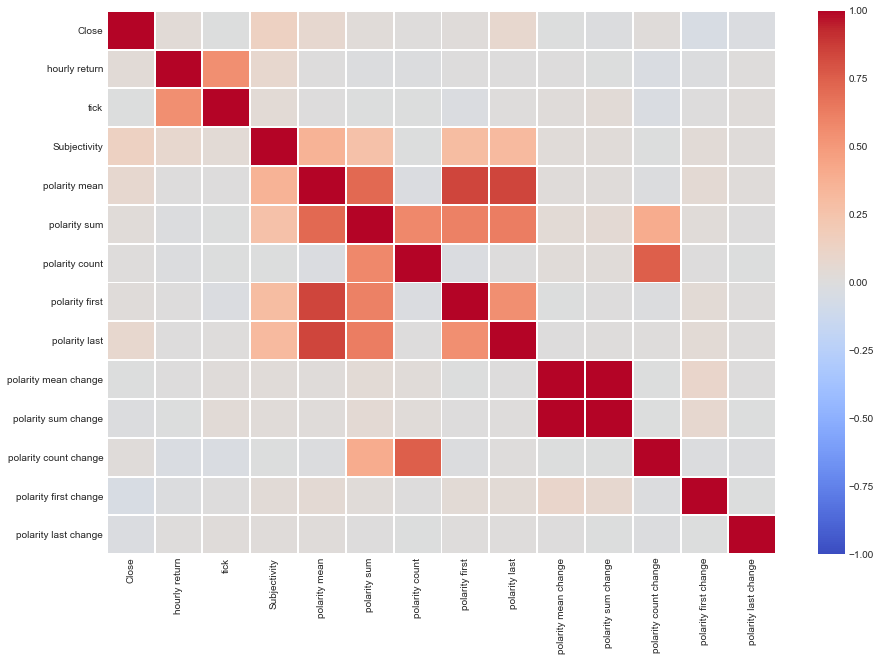

In [71]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(correlation_data, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using various sentiment score(Polarity only) for only the texts that matches with market hours. 

In [38]:
# Dropping unmatching rows 
df_2 = df_data.dropna()
df_2

Close  hourly return  tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
date only  hour                                                                                                                                                                                                                                          
2018-10-22 13     52.009998       0.012222   1.0      0.477778       0.483333      1.450000               3        0.250000       0.700000              1.729412                  inf                    inf           0.000000e+00              4.250000
2018-10-23 13     58.645000       0.001656   1.0      0.596296       0.466667      0.466667               1        0.466667       0.466667             83.000000                  inf                    inf           8.300000e+01             83.000000
           14     58.859997       0.003666   1.0      0.483194       0.020521      0.082083               4       -0.041667       0.123750             -0.956027            -0.824107               3.000000          -1.089286e+00             -0.734821
2018-10-25 11     62.168324       0.008997   1.0      0.237500       0.137500      0.275000               2       -0.100000       0.375000              0.375000                  inf                    inf          -2.000000e+00              2.750000
           12     62.575001       0.006542   1.0      0.250000       0.150000      0.300000               2        0.300000       0.000000              0.090909             0.090909               0.000000          -4.000000e+00             -1.000000
2018-10-26 12     65.309998      -0.025671   0.0      0.241667       0.200000      0.200000               1        0.200000       0.200000                   inf                  inf               0.000000                    inf                   inf
           13     65.166000      -0.002205   0.0      0.191667       0.050000      0.100000               2        0.000000       0.100000             -0.750000            -0.500000               1.000000          -1.000000e+00             -0.500000
           14     66.129997       0.014793   1.0      0.300000       0.350000      0.700000               2        0.700000       0.000000              6.000000             6.000000               0.000000                    inf             -1.000000
2018-10-31 12     68.034004       0.004016   1.0      0.358333       0.086667      0.086667               1        0.086667       0.086667             -0.566667                  inf                    inf          -5.666667e-01             -0.566667
2018-11-01 14     68.867996      -0.003819   0.0      0.533333      -0.333333     -0.333333               1       -0.333333      -0.333333             -2.296296                 -inf                    inf          -2.296296e+00             -2.296296
2018-11-02 14     69.241997      -0.002075   0.0      0.540333       0.118667      0.118667               1        0.118667       0.118667                   inf                  inf                    inf                    inf                   inf
2018-11-06 10     69.293480       0.003526   1.0      0.412500       0.400000      0.800000               2        0.800000       0.000000             -0.200000                  inf                    inf           6.000000e-01             -1.000000
           12     69.000000      -0.003513   0.0      0.888889       0.500000      0.500000               1        0.500000       0.500000              4.714286             0.428571              -0.750000                    inf                   inf
2018-11-07 14     69.615997      -0.000144   0.0      0.620000       0.280000      0.280000               1        0.280000       0.280000              4.600000             1.800000              -0.500000           1.800000e+00                   inf
2018-11-09 11     70.0

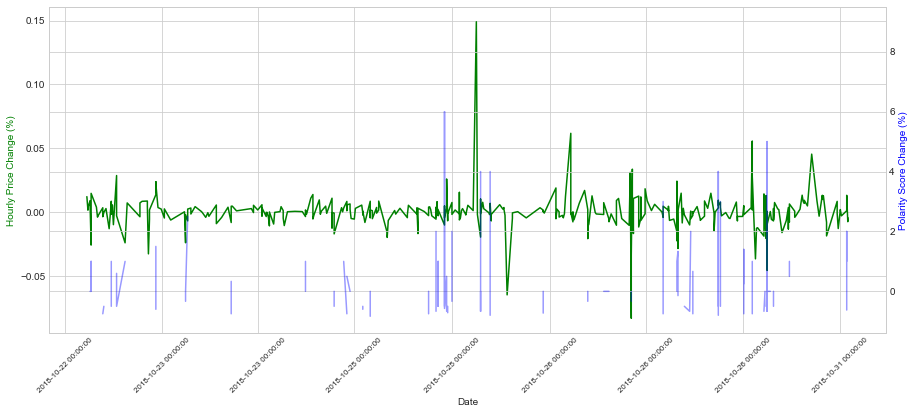

In [67]:
# plot polarity mean change vs hourly return
date_only = df_2.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_2['hourly return'], color='g')
ax2.plot(date_only, df_2['polarity count change'], color='b', alpha=0.4)

ax1.set_xlabel('Date')
ax1.set_ylabel('Hourly Price Change (%)', color='g')
ax2.set_ylabel('Polarity Score Change (%)', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)

fig.show();

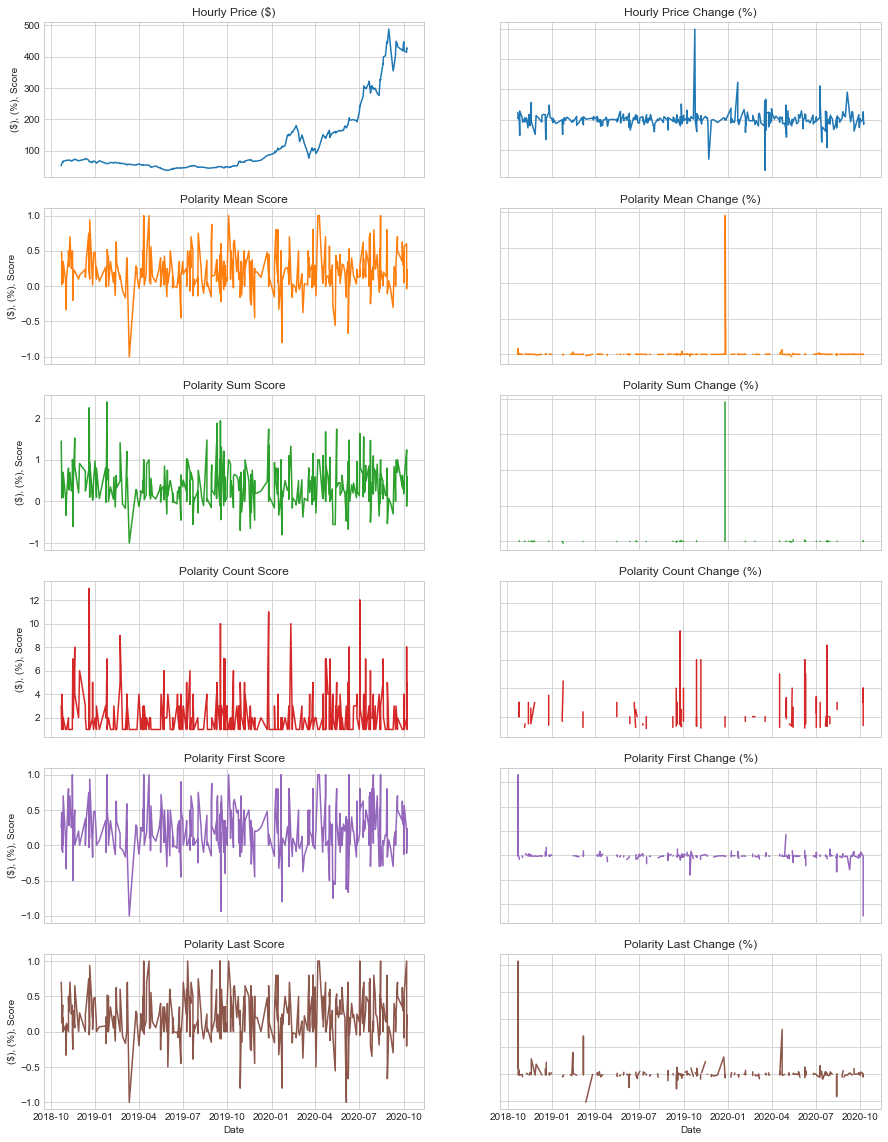

In [64]:
# plot total overviews
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(6, 2, figsize=(15,20))
axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity mean'], 'tab:orange')
axs[1, 0].set_title('Polarity Mean Score')
axs[2, 0].plot(date_only, df_2['polarity sum'], 'tab:green')
axs[2, 0].set_title('Polarity Sum Score')
axs[3, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[3, 0].set_title('Polarity Count Score')
axs[4, 0].plot(date_only, df_2['polarity first'], 'tab:purple')
axs[4, 0].set_title('Polarity First Score')
axs[5, 0].plot(date_only, df_2['polarity last'], 'tab:brown')
axs[5, 0].set_title('Polarity Last Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity mean change'], 'tab:orange')
axs[1, 1].set_title('Polarity Mean Change (%)')
axs[2, 1].plot(date_only, df_2['polarity sum change'], 'tab:green')
axs[2, 1].set_title('Polarity Sum Change (%)')
axs[3, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[3, 1].set_title('Polarity Count Change (%)')
axs[4, 1].plot(date_only, df_2['polarity first change'], 'tab:purple')
axs[4, 1].set_title('Polarity First Change (%)')
axs[5, 1].plot(date_only, df_2['polarity last change'], 'tab:brown')
axs[5, 1].set_title('Polarity Last Change (%)')

for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

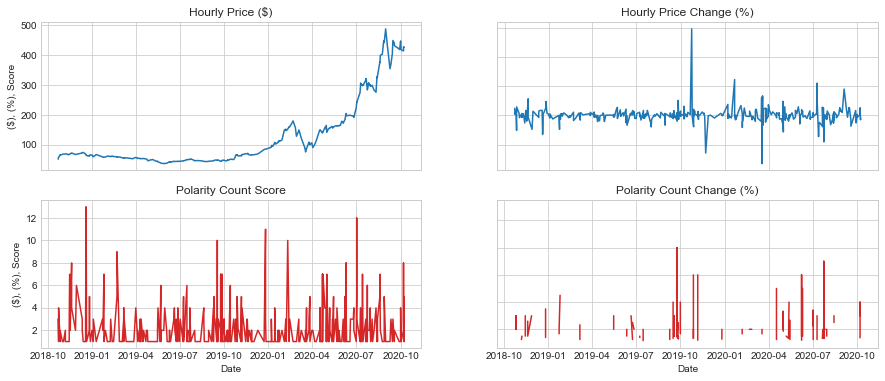

In [66]:
date_only = df_2.index.get_level_values(0)

fig, axs = plt.subplots(2, 2, figsize=(15,6))
axs[0, 0].plot(date_only, df_2['Close'])
axs[0, 0].set_title('Hourly Price ($)')
axs[1, 0].plot(date_only, df_2['polarity count'], 'tab:red')
axs[1, 0].set_title('Polarity Count Score')

axs[0, 1].plot(date_only, df_2['hourly return'])
axs[0, 1].set_title('Hourly Price Change (%)')
axs[1, 1].plot(date_only, df_2['polarity count change'], 'tab:red')
axs[1, 1].set_title('Polarity Count Change (%)')


for ax in axs.flat:
    ax.set(xlabel='Date', ylabel='($), (%), Score')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [68]:
# Try the pct change of price and polarity
df_pct = df_mean_matching.copy()
df_pct['polarity change'] = df_pct['Polarity'].pct_change()
df_pct.head()


Close  hourly return  tick  Subjectivity  Polarity  polarity change
date only  hour                                                                         
2019-10-16 14    51.938038       0.005460   1.0      0.250000  0.650000              NaN
2019-10-21 14    50.685997       0.001304   1.0      0.549495  0.202104        -0.689070
2019-10-23 11    51.034000       0.005398   1.0      0.283333  0.116667        -0.422741
2019-10-24 8     58.573997       0.149010   1.0      0.888889  0.500000         3.285714
2019-10-25 14    65.638000      -0.001775   0.0      0.313889  0.089583        -0.820833

C:\Users\Sungwon Kim\anaconda3\envs\dev\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


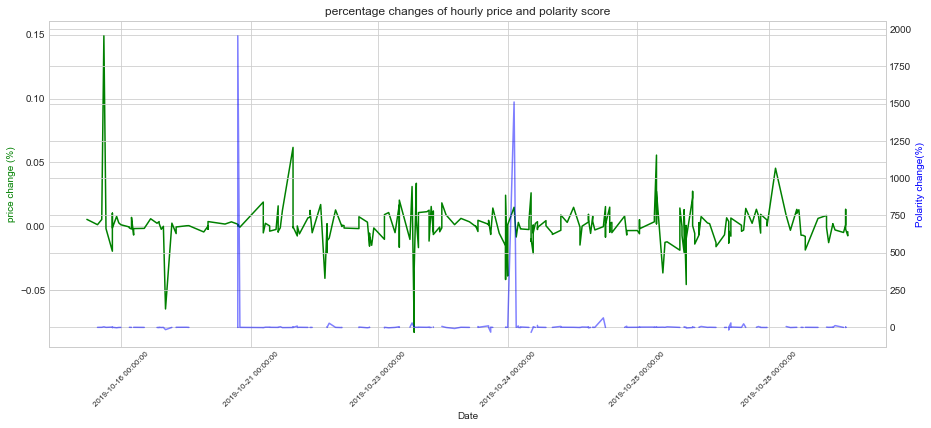

In [83]:
date_only = df_pct.index.get_level_values(0)

fig, ax1 = plt.subplots(figsize=(15,6))

ax2 = ax1.twinx()
ax1.plot(date_only, df_pct['hourly return'], color='g')
ax2.plot(date_only, df_pct['polarity change'], color='b', alpha=0.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('price change (%)', color='g')
ax2.set_ylabel('Polarity change(%)', color='b')
ax1.set_xticklabels(date_only, rotation=45, size=8)
ax1.set_title('percentage changes of hourly price and polarity score')
fig.show();

In [39]:
correlation = df_2.corr()
correlation

Close  hourly return      tick  Subjectivity  polarity mean  polarity sum  polarity count  polarity first  polarity last  polarity mean change  polarity sum change  polarity count change  polarity first change  polarity last change
Close                  1.000000       0.023076  0.035674      0.073853       0.047985      0.035879        0.045795        0.006071       0.029065             -0.023715            -0.038775               0.079731              -0.106927             -0.048468
hourly return          0.023076       1.000000  0.534817      0.103987      -0.003758     -0.041996       -0.050392        0.006788      -0.016757              0.006692             0.009164              -0.021140              -0.044532              0.044189
tick                   0.035674       0.534817  1.000000      0.062193       0.009696      0.001181        0.009759       -0.012195       0.015859              0.059773             0.092571               0.023434              -0.015417              0.054021
Subjectivity           0.073853       0.103987  0.062193      1.000000       0.277430      0.090759       -0.192445        0.244732       0.192198              0.006354             0.021503              -0.126891               0.039973              0.010409
polarity mean          0.047985      -0.003758  0.009696      0.277430       1.000000      0.658115       -0.151239        0.813801       0.829195              0.070367             0.116098               0.003821               0.149543              0.257090
polarity sum           0.035879      -0.041996  0.001181      0.090759       0.658115      1.000000        0.474782        0.586016       0.585613              0.119984             0.160836               0.432530               0.096594              0.154266
polarity count         0.045795      -0.050392  0.009759     -0.192445      -0.151239      0.474782        1.000000       -0.077805      -0.114583              0.015276             0.016955               0.637702              -0.005481             -0.017290
polarity first         0.006071       0.006788 -0.012195      0.244732       0.813801      0.586016       -0.077805        1.000000       0.472107             -0.017631            -0.039135               0.029645               0.116063              0.183113
polarity last          0.029065      -0.016757  0.015859      0.192198       0.829195      0.585613       -0.114583        0.472107       1.000000              0.090178             0.135989               0.048316               0.133391              0.252018
polarity mean change  -0.023715       0.006692  0.059773      0.006354       0.070367      0.119984        0.015276       -0.017631       0.090178              1.000000             0.999673              -0.027998               0.036349              0.800864
polarity sum change   -0.038775       0.009164  0.092571      0.021503       0.116098      0.160836        0.016955       -0.039135       0.135989              0.999673             1.000000              -0.019695               0.009127              0.439256
polarity count change  0.079731      -0.021140  0.023434     -0.126891       0.003821      0.432530        0.637702        0.029645       0.048316             -0.027998            -0.019695               1.000000               0.088774              0.110463
polarity first change -0.106927      -0.044532 -0.015417      0.039973       0.149543      0.096594       -0.005481        0.116063       0.133391              0.036349             0.009127               0.088774               1.000000              0.721268
polarity last change  -0.048468       0.044189  0.054021      0.010409       0.257090      0.154266       -0.017290        0.183113       0.252018              0.800864             0.439256               0.110463               0.721268              1.000000

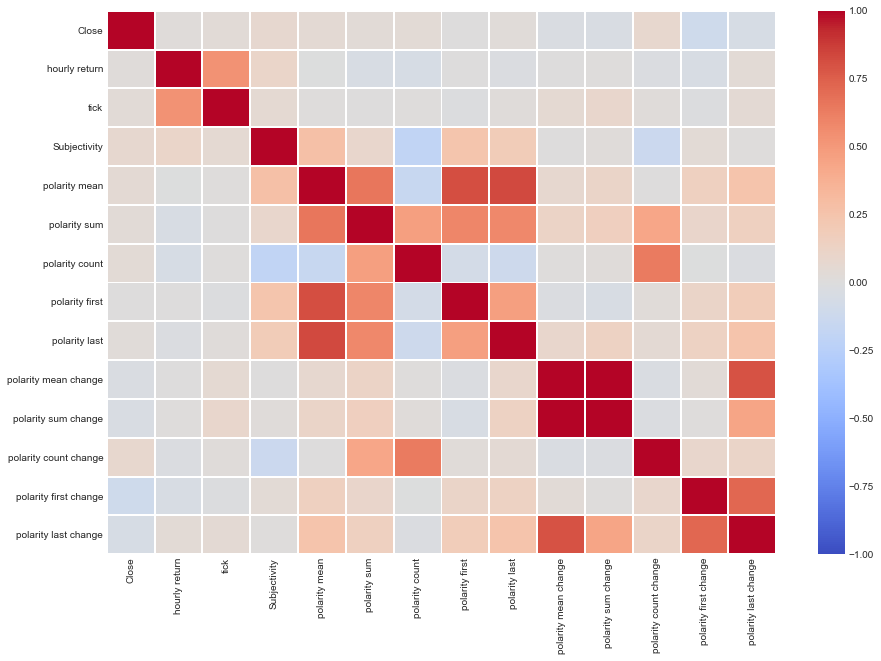

In [40]:
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(correlation, vmin=-1, vmax=1, linewidth=1, cmap='coolwarm');

### 2. Using `summation` sentiment score(Polarity only) for market hours texts only. 

In [108]:
df['Subjectivity'].mean()

0.3728035552682519

In [109]:
df['Subjectivity'].std()

0.3098927023019429

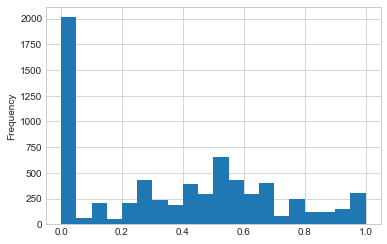

In [172]:
df['Subjectivity'].plot(kind='hist', bins=20)